In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the first dataset
df0 = pd.read_csv("../data/tmdb.movies.csv.gz", compression="gzip")
df0.to_csv("tmdb.movies.csv", index=False)
df0.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
#Loading the second dataset
df1 = pd.read_csv("../data/tn.movie_budgets.csv.gz", compression="gzip")
df1.to_csv("tn.movie_budgets.csv", index=False)
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
df1.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [5]:
df1.duplicated().value_counts()

False    5782
dtype: int64

In [6]:
for col in ["production_budget", "domestic_gross", "worldwide_gross"]:
    df1[col] = (
        df1[col]
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

In [7]:
df1.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [8]:
#Create profit column
df1["profit"] = df1["worldwide_gross"] - df1["production_budget"]
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [9]:
#Loading the third dataset
df2 = pd.read_csv("../data/rt.movie_info.tsv.gz", compression="gzip", sep='\t')
df2.to_csv("rt.movie_info.csv", index=False, sep='\t')
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
#Loading the fourth dataset
df3 = pd.read_csv("../data/bom.movie_gross.csv.gz", compression="gzip")
df3.to_csv("bom.movie_gross.csv", index=False)
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
df3.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [12]:
df3['foreign_gross'] = (
    df3['foreign_gross']
    .replace('[\$,]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)


In [13]:
df3.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [14]:
conn = sqlite3.connect("../data/im.db")

df4 = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
df4

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [15]:
movie_basics1 =pd.read_sql_query('''SELECT primary_title, start_year, genres
                  FROM movie_basics;
                  ''', conn)

In [16]:
movie_basics1.head()

,primary_title,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [17]:
movie_basics1.isna().sum()

primary_title       0
start_year          0
genres           5408
dtype: int64

In [18]:
movie_basics1.shape

(146144, 3)

In [19]:
movie_basics1['genres'].fillna('Unknown', inplace=True)

In [20]:
movie_ratings =pd.read_sql_query('''SELECT *
                  FROM movie_ratings;
                  ''', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
# Merging using movie title as the key
merged = pd.merge(
    df1,
    movie_basics1,
    left_on="movie",
    right_on="primary_title",
    how="inner"   # keeps only movies that appear in both datasets
)

In [22]:
merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,Avatar,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


Merging the new merge with movie ratings by title

In [23]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
#This line runs an SQL query directly on the SQLite database to get movie_id, 
# primary_title, and start_year columns from the movie_basics table.
movie_basics2 = pd.read_sql_query(
    "SELECT movie_id, primary_title, start_year FROM movie_basics;",
    conn
)
#Merges the movie ratings table with movie_basics2, matching them by the movie_id column.
#how="left" keeps all rows from movie_ratings, adding title and year info where a match is found.
ratings_with_titles = movie_ratings.merge(movie_basics2, on="movie_id", how="left")

merged_by_title = pd.merge(
    merged,
    ratings_with_titles[['primary_title', 'start_year', 'averagerating', 'numvotes']].drop_duplicates(),
    on=['primary_title', 'start_year'],
    how='left'
)

merged_by_title.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,primary_title,start_year,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,Avatar,2011,Horror,6.1,43.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926.0


I will start by removing rows from merged_by_title with missing values from averagerating and profit column. This is followed by plotting a scatter plot to show how average rating and profit relate.

I will then proceed to compute the Pearson correlation coefficient between averagerating and profit.


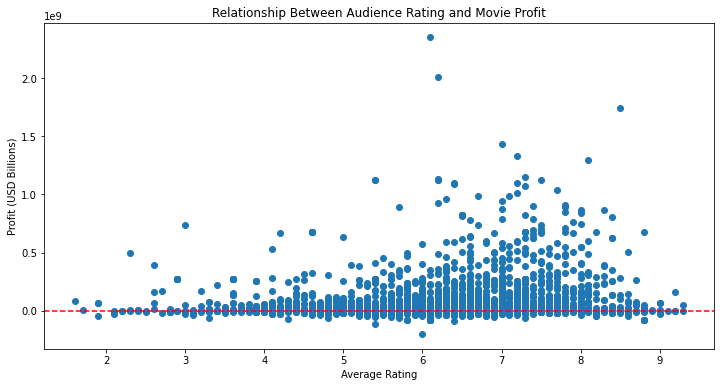

Correlation between rating and profit: 0.127


In [25]:
data_clean = merged_by_title.dropna(subset=['averagerating', 'profit'])

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_clean['averagerating'], data_clean['profit'])
plt.xlabel('Average Rating')
plt.ylabel('Profit (USD Billions)')
plt.title('Relationship Between Audience Rating and Movie Profit')
plt.axhline(y=0, color='r', linestyle='--') 
#Draws a horizontal reference line at y = 0 (zero profit) in red.
# This helps visually separate profitable vs. loss-making movies.
plt.show()

# Calculate correlation
correlation = data_clean['averagerating'].corr(data_clean['profit'])
print(f"Correlation between rating and profit: {correlation:.3f}")


The Pearson correlation coefficient between a movie’s rating and its profit (revenue − budget) is 0.127. This is a weak positive relationship. This means that as ratings increase, profits tend to increase slightly, but the relationship is not strong (higher ratings slightly associate with higher profits)

RECOMMENDATION

Business stakeholders should not focus on user ratings as it does necessarily translate to higher profits. They should focus on other factors such as production budget and best performing genres.

Ratings might help a bit, but other factors (like genre, marketing, or budget) likely play a bigger role in determining profits.

The rating range between 0 and 5 shows many poorly rate movies lost money
On average, higher rated movies tend to earn more profit but this is heavily unreliable due to th weak correlation

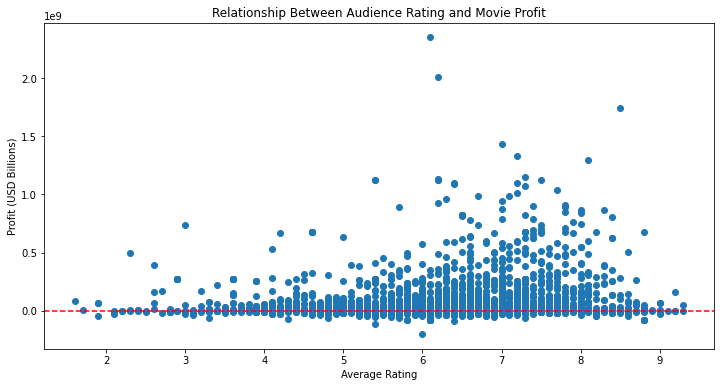

Correlation between rating and profit: 0.127


In [26]:
# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data_clean['averagerating'], data_clean['profit'])
plt.xlabel('Average Rating')
plt.ylabel('Profit (USD Billions)')
plt.title('Relationship Between Audience Rating and Movie Profit')
plt.axhline(y=0, color='r', linestyle='--') 
#Draws a horizontal reference line at y = 0 (zero profit) in red.
# This helps visually separate profitable vs. loss-making movies.
plt.show()

# Calculate correlation
correlation = data_clean['averagerating'].corr(data_clean['profit'])
print(f"Correlation between rating and profit: {correlation:.3f}")